# Morenny Rock Glacier Optical Imagery Example

## Download data from planet.com website

Create an Account or Log In: To access data, you generally need an account with https://www.planet.com . If you don't have one, you'll need to sign up. Otherwise, log in with your existing credentials.


![Step 1](./data/morenny/optical/planet_screenshot1.png)


## Import AkhDefo Packages.

In [9]:

#Functions for data preparations
import akhdefo_functions
from akhdefo_functions import akhdefo_download_planet
from akhdefo_functions import read_data_prep
from akhdefo_functions import move_files_with_string
from akhdefo_functions import Crop_to_AOI

#Functions data processing
from akhdefo_functions import scatter_area_mask
from akhdefo_functions import Raster_Correction
from akhdefo_functions import Optical_flow_akhdefo

#Functions for shapefile point data interpolation to raster geotif
#Function Autovariogram use Kriging method it fits the data to different variogram models and automatically use the best fit variogram model (Computationally Heavy but you can process data in chunks)
from akhdefo_functions import Auto_Variogram

# interpoate_xyz uses the following interpolation methods (nearest, linear and cubic)
from akhdefo_functions import interpolate_xyz

#Functions for data Visualization and Analysis
from akhdefo_functions import MeanProducts_plot_ts
from akhdefo_functions import plot_stackNetwork
from akhdefo_functions import akhdefo_viewer
from akhdefo_functions import akhdefo_dashApp

## Download Data using Planetlab API Account

In [ ]:

''' 

First Run the below command and make sure {download=False} to see list of available dataset. 

Its highly recommended to use data frame same path for the entire time-series for more accurate results
 
'''

#uncomment below to download data using planet lab api key

''' 
akhdefo_download_planet(planet_api_key='', AOI='./data/morenny/AOI.shp', start_date='May 1, 2018', end_date=' September 30 2022', limit=5, item_type='PSScene',
                        product_bundle='analytic_sr_udm2', 
                        clear_percent=90, cloud_filter=0.1,
                        output_folder='raw_data',
                        clip_flag=True, download_data=False

'''
# for this excecise we download data from planet labs explorer web application 
#Lets Navigate to the zip folder directory

import os

# Replace 'your_directory_path' with the path of your directory
zip_dir = './data/morenny/optical/zip_folder/'

# List all files and directories in the specified path
contents = os.listdir(zip_dir)

# Print the contents
for item in contents:
    print(item)
    
# The zip folder inside the zip folder directory inclue cropped planet lab imagery between 2018 to 2022. lets extract the data and look at the images

## Extract downloaded zip files

In [ ]:
#This functions extracts data from all the granuples zip directory.
read_data_prep(zip_dir=zip_dir,
                                 image_dir='./data/morenny/optical/image_dir', 
                                 ext_image_file='_SR_clip.tif', udm_mask_dir='./data/morenny/optical/udm_mask_dir', ext_udm_mask_file='udm2_clip.tif')

In [ ]:
# This function will move all the data from each granules subdir to a single folder
# move_files_with_string(source_dir='./data/morenny/optical/RS_dir_path129/', dest_dir='./data/morenny/optical/RS_path129', search_string='.tif')
# move_files_with_string(source_dir='./data/morenny/optical/scatter_dir/', dest_dir='./data/morenny/optical/scatter_rs', search_string='.tif')


In [ ]:

''' 
Crop all raster to Area of interest bounding box


'''
Crop_to_AOI(Path_to_WorkingDir='./data/morenny/optical/image_dir', 
                              Path_to_AOI_shapefile='./data/morenny/AOI.shp', 
                              output_CroppedDir='./data/morenny/optical/image_dir_aoi', file_ex='.tif')



## Preparing raster for optical flow and displacement calculation!

The data needs to be converted to "uint8" format and be calibrated and normalized.


In [ ]:
import warnings
warnings.filterwarnings("ignore")


Raster_Correction(input_path="./data/morenny/optical/image_dir_aoi", output_path="./data/morenny/optical/image_dir_aoi_filt", limit=None,
                                    lowpass_kernel_size=None, bilateral_win_size=7, bilateral_sigma_color=75,
                                    bilateral_sigma_spatial=75,
                                    clip_percentiles=[2, 98], optical=True, 
                                    scale=None, Vegetation_mask=None)

## Applying optical flow and producing time-series deformation products.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Optical_flow_akhdefo(input_dir='./data/morenny/optical/image_dir_aoi_filt', output_dir='./data/morenny/optical/geo', AOI='./data/morenny/AOI.shp', zscore_threshold=2, 
                                       ssim_thresh=0.65, image_resolution='3.125m', interpolate='kriging', 
                                       show_figure=False, point_size=2, dem_path='./data/morenny/dem.tif', smoothing_kernel_size=2, 
                                       Vegetation_mask=None, VEL_scale='year', VEL_Mode='linear', good_match_option=0.75, 
                                       hillshade_option=True, shapefile_output=True, max_triplet_interval=300, pixel_size=10, num_chunks=10, overlap_percentage=0, pyr_scale=0.5, levels=15, 
                                       winsize=128, iterations=7, poly_n=7, poly_sigma=1.5,
                                       flags=1, master_reference='single', 
                                       selection_Mode='pair', start_date=None, end_date=None, krig_method='universal',spatial_ref=True)

In [5]:
import akhdefo_functions
from akhdefo_functions import Auto_Variogram

Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_N.shp', column_attribute='VEL'
               , pixel_size=20, num_chunks=1, out_fileName='N', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal')


Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_E.shp', column_attribute='VEL'
               , pixel_size=20, num_chunks=1, out_fileName='E', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal')



Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp', column_attribute='VEL'
               , pixel_size=20, num_chunks=1, out_fileName='2DVEL', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal')



Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp', column_attribute='aspect'
               , pixel_size=10, num_chunks=10, out_fileName='aspect_test', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal', detrend_data=True)

c:\Users\mahmud\anaconda3\envs\akhdefov2\lib\site-packages\gstools\covmodel\plot.py:114: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



kriging succeed with Model: Exponential and score: 0.9832856137123828


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

## Visualize Displacement Products

In [5]:
akhdefo_functions.calculate_and_save_aspect_raster(ew_raster_path= './data/morenny/optical/VEL_Folder/E.tif', ns_raster_path= './data/morenny/optical/VEL_Folder/N.tif',
                                 output_raster_path= './data/morenny/optical/VEL_Folder/aspect.tif')

* Lets plot Annual Linear velocity in merter/year overlayed by detrended vector motion.
* Zero value of the aspect colorbar represents True North, Negative west and Positive is East. for instance -40 is equal direction of movement North 40 degree towards west (40NW)

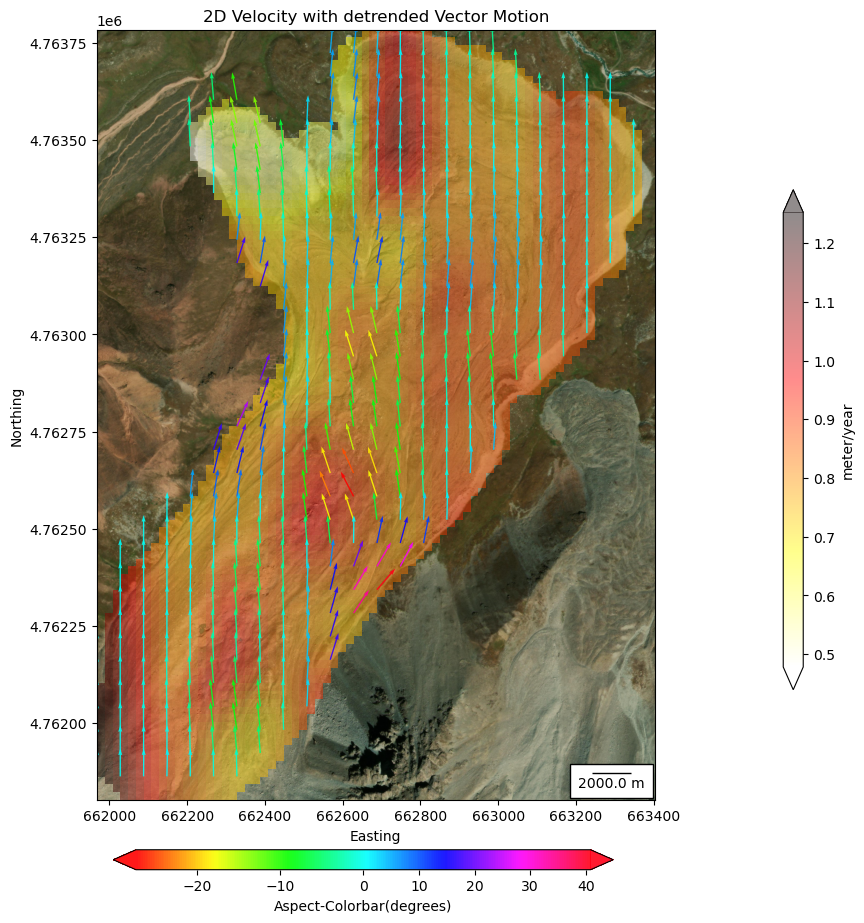

In [14]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/morenny/basemap.tif', raster_file='./data/morenny/optical/VEL_Folder/2DVEL.tif', output_folder='./data/morenny/optical/Figs_analysis/',
                                 title='2D Velocity with detrended Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="2DVEL_WithVectorMotion_detrend.png", 
                   alpha=0.9, unit_conversion=None, no_data_mask=True, 
                   colormap='hot_r'
                   , min_value=None, max_value=None, 
                   normalize=True, colorbar_label='meter/year',
                   show_figure=True, aspect_raster='./data/morenny/optical/VEL_Folder/aspect_test_simple_detrend.tif', cmap_aspect='hsv' , step=2)

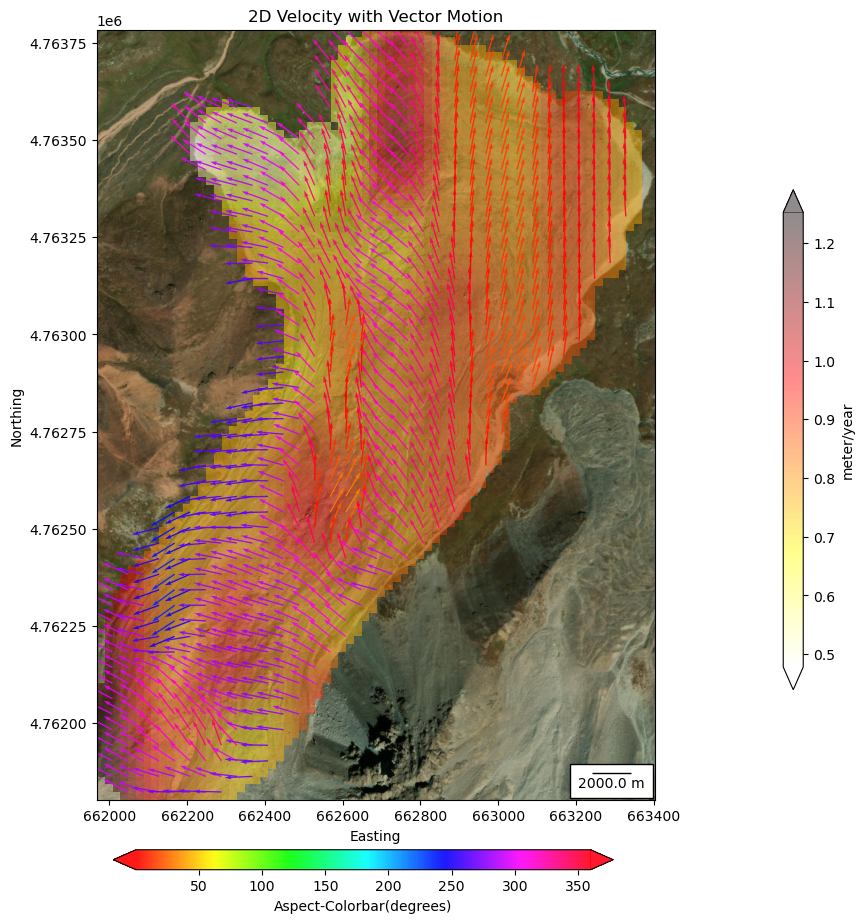

In [13]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/morenny/basemap.tif', raster_file='./data/morenny/optical/VEL_Folder/2DVEL.tif', output_folder='./data/morenny/optical/Figs_analysis/',
                                 title='2D Velocity with Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="2DVEL_WithVectorMotion.png", 
                   alpha=0.9, unit_conversion=None, no_data_mask=True, 
                   colormap='hot_r'
                   , min_value=None, max_value=None, 
                   normalize=True, colorbar_label='meter/year',
                   show_figure=True, aspect_raster='./data/morenny/optical/VEL_Folder/aspect.tif', cmap_aspect='hsv' , step=2)

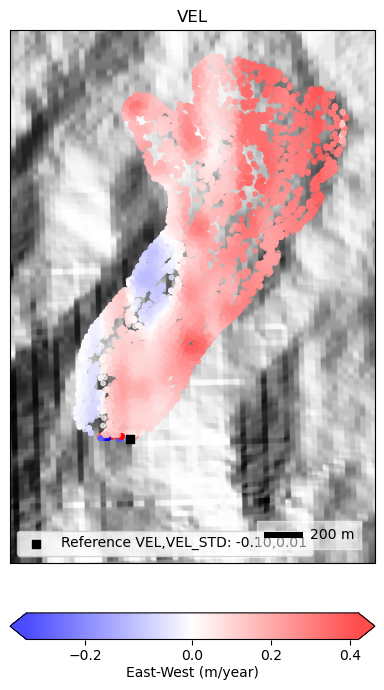

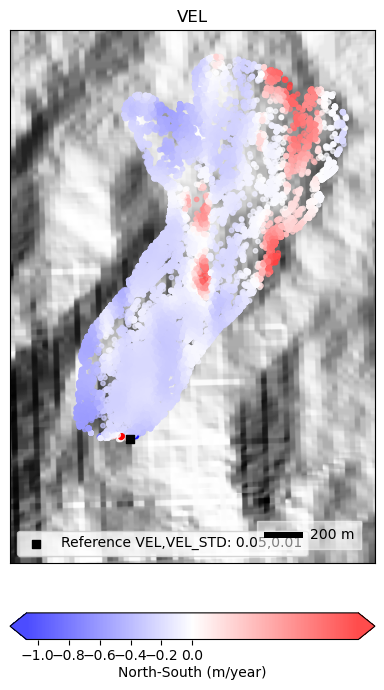

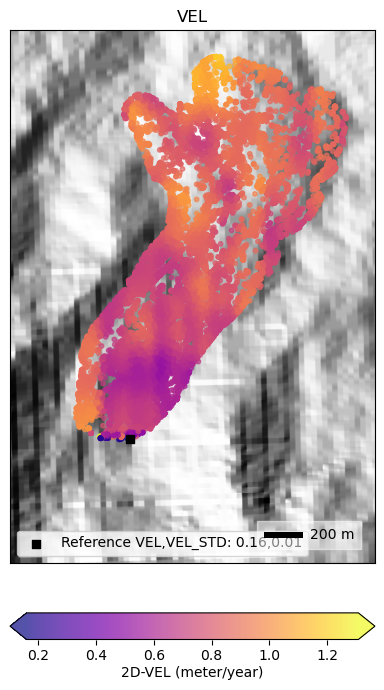

In [10]:
#Visualize Mean Velocity East-West
# if set batch_plot=True it will plot static time series figure for each date acquisition 

MeanProducts_plot_ts(path_to_shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_E.shp', 
                                       dem_path='./data/morenny/dem.tif', out_folder='./data/morenny/optical/Figs_analysis/E', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='bwr', point_size=10, 
                                       cbar_label='East-West (m/year)', 
                                       batch_plot=False)

#Visualize Mean Velocity North-South
MeanProducts_plot_ts(path_to_shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_N.shp', 
                                       dem_path='./data/morenny/dem.tif', out_folder='./data/morenny/optical/Figs_analysis/N', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='bwr', point_size=10, 
                                       cbar_label='North-South (m/year)', 
                                       batch_plot=False)

#Visualize Mean Velocity 2D Velocity 
MeanProducts_plot_ts(path_to_shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp', 
                                       dem_path='./data/morenny/dem.tif', out_folder='./data/morenny/optical/Figs_analysis/2D', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='plasma', point_size=10, 
                                       cbar_label='2D-VEL (meter/year)', 
                                       batch_plot=False)

## Interactive Time Series Analysis in a Dash Web App

This plot is part of an interactive web application. Users have the ability to select groups of data points using either the box select or lasso tool, which are superimposed on a satellite image base map. The selected data will then be reflected in the time series chart. Additionally, users can customize the axis labels to suit their dataset; for example, if the dataset measures displacement or velocity in meters, the y-axis label can be adjusted accordingly from the default mm. Furthermore, users can download their analysis and the generated figures directly from the web application.


![Step 1](./data/morenny/optical/dash2d1.png)

![dash2d_optical output sample1](./data/morenny/optical/newplot10.png)

![dash2d_optical output sample2](./data/morenny/optical/newplot9.png)

In [ ]:
import akhdefo_functions

akhdefo_functions.akhdefo_dashApp(
Path_to_Shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp',
                                  port=8047, BaseMap=True, basemap_type='image')

In [ ]:

akhdefo_dashApp(
Path_to_Shapefile='../data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_N.shp',
                                  port=8056, BaseMap=True, basemap_type='image')

In [ ]:

akhdefo_dashApp(
Path_to_Shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_E.shp',
                                  port=8055, BaseMap=True, basemap_type='image')